---

# Charpter 1 : The graph

---

This notebook is implement the code from **Joel Grus, Data Science form Scratch, chapter 1 intorduction.py.** by adding the graph.

I alter the original code on my style.

## ``Users``
The requrirement gives us a **list of dicts**, ``Users``, each dict element contains `"id"` and ``"name"``. 

For readability, let use ``dict`` instead of list.

In [1]:
User = {
     0: "Hero" ,
     1: "Dunn" ,
     2: "Sue"  ,
     3: "Chi"  ,
     4: "Thor" ,
     5: "Clive",
     6: "Hicks",
     7: "Devin",
     8: "Kate" ,
     9: "Klein"}

type(User), User

(dict,
 {0: 'Hero',
  1: 'Dunn',
  2: 'Sue',
  3: 'Chi',
  4: 'Thor',
  5: 'Clive',
  6: 'Hicks',
  7: 'Devin',
  8: 'Kate',
  9: 'Klein'})

## ``Friendship_pair`` and  ``Friendship``
The requirement also gives us a list of pair of friend, each ``user`` be friend with the other define by the tupple of id. So (0,1) means ``"Hero"`` and ``"Dunn"`` knowing each other.
``friendship_pairs`` is the **list of tupple** contains this relation.

In [2]:
Friendship_pair = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
                    (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]
# sort to manage the order of the first element
Friendship_pair.sort(reverse=False)
type(Friendship_pair), Friendship_pair

(list,
 [(0, 1),
  (0, 2),
  (1, 2),
  (1, 3),
  (2, 3),
  (3, 4),
  (4, 5),
  (5, 6),
  (5, 7),
  (6, 8),
  (7, 8),
  (8, 9)])

In [3]:
Friendship = {id:[] for id in User.keys()}
Friendship


{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}

In [4]:
# And loop over the friendship pairs to populate it:
for i, j in Friendship_pair:
    Friendship[i].append(j)  # Add j as a friend of user i
    Friendship[j].append(i)  # Add i as a friend of user j
    
    
display(Friendship)
display(Friendship[7])


{0: [1, 2],
 1: [0, 2, 3],
 2: [0, 1, 3],
 3: [1, 2, 4],
 4: [3, 5],
 5: [4, 6, 7],
 6: [5, 8],
 7: [5, 8],
 8: [6, 7, 9],
 9: [8]}

[5, 8]

In [5]:
for key in Friendship:
    print('Number of friend',len(Friendship[key]))

Number of friend 2
Number of friend 3
Number of friend 3
Number of friend 3
Number of friend 2
Number of friend 3
Number of friend 2
Number of friend 2
Number of friend 3
Number of friend 1


## Wrong data soruce to gen map

First before create the graph, make sure understand the source of data. The ``Friendship`` seem not a good data source to depict the relation beteween each user in graph since the redundancy.

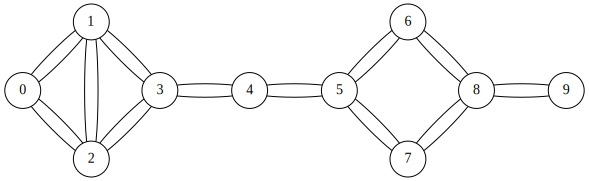

// Data Sciencester Network in a bad data input 
graph DataSciencester {
	graph [rankdir=LR]
	node [color=black fontcolor=black shape=circle]
	0 -- 1
	0 -- 2
	1 -- 0
	1 -- 2
	1 -- 3
	2 -- 0
	2 -- 1
	2 -- 3
	3 -- 1
	3 -- 2
	3 -- 4
	4 -- 3
	4 -- 5
	5 -- 4
	5 -- 6
	5 -- 7
	6 -- 5
	6 -- 8
	7 -- 5
	7 -- 8
	8 -- 6
	8 -- 7
	8 -- 9
	9 -- 8
}


In [6]:
from graphviz import Graph
G =  Graph(comment='Data Sciencester Network in a bad data input ',
                  name='DataSciencester',
                  filename='Digraph.gv',
                  format='png',
                  engine='circo',
                  graph_attr= {'rankdir':'LR'})
G.attr('node', color = 'black', fontcolor='black', shape='circle')

edge = []
for user, friend in Friendship.items():
    for f in friend:
        edge.append('{0}{1}'.format(str(user),str(f)))
G.edges(edge)
display(G)
print(G)    

## A proper choice
To draw the graph for friendship, we ned only the Friendship_pair that already sorted without redundancy.

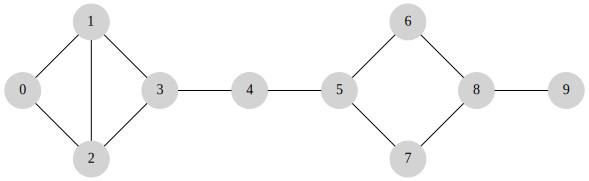

// Data Sciencester Network in a better way
graph DataSciencester {
	graph [rankdir=LR]
	node [color=lightgrey fontcolor=black shape=circle style=filled]
	0 -- 1
	0 -- 2
	1 -- 2
	1 -- 3
	2 -- 3
	3 -- 4
	4 -- 5
	5 -- 6
	5 -- 7
	6 -- 8
	7 -- 8
	8 -- 9
}


In [7]:
G =  Graph(comment='Data Sciencester Network in a better way',
                  name='DataSciencester',
                  filename='Digraph.gv',
                  format='png',
                  engine='circo',
                  #engine='dot',
                  graph_attr= {'rankdir':'LR'}
          )
G.attr('node',  style='filled', color='lightgrey',fontcolor='black', shape='circle')
edge = []
for f in Friendship_pair:
    edge.append("{0}{1}".format(f[0],f[1]))
G.edges(edge)
display(G)
print(G)     

We need just only one unique pair, (0,1) and (1,0) is the same, so the ``friendship_pairs`` fit to our ambition to draw a graph.

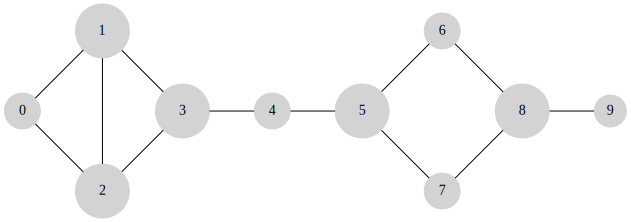

// Data Sciencester Network in a better way
graph DataSciencester {
	graph [rankdir=LR]
	node [color=lightgrey fontcolor=black shape=circle style=filled]
	0 [width=0.5]
	1 [width=0.75]
	2 [width=0.75]
	3 [width=0.75]
	4 [width=0.5]
	5 [width=0.75]
	6 [width=0.5]
	7 [width=0.5]
	8 [width=0.75]
	9 [width=0.25]
	0 -- 1
	0 -- 2
	1 -- 2
	1 -- 3
	2 -- 3
	3 -- 4
	4 -- 5
	5 -- 6
	5 -- 7
	6 -- 8
	7 -- 8
	8 -- 9
}


In [8]:
G =  Graph(comment='Data Sciencester Network in a better way',
                  name='DataSciencester',
                  filename='Digraph.gv',
                  format='png',
                  engine='circo',
                  #engine='dot',
                  graph_attr= {'rankdir':'LR'}
          )
G.attr('node',  style='filled', color='lightgrey',fontcolor='black', shape='circle')
edge = []

# set the node size 1.5 times the  number of friend
for key in Friendship:    
    G.node(str(key), width=str(2.5*len(Friendship[key])/10))

for f in Friendship_pair:
    edge.append("{0}{1}".format(f[0],f[1]))
    
G.edges(edge)
display(G)
print(G)        

---